Classification :
 wheather forcasting

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("weatherHistory.csv", parse_dates=True, index_col=0)

In [ ]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
dataset = data[['Humidity', 'Pressure (millibars)', 'Precip Type']]
dataset.head()

,Humidity,Pressure (millibars),Precip Type
Formatted Date,,,
2006-04-01 00:00:00+02:00,0.89,1015.13,rain
2006-04-01 01:00:00+02:00,0.86,1015.63,rain
2006-04-01 02:00:00+02:00,0.89,1015.94,rain
2006-04-01 03:00:00+02:00,0.83,1016.41,rain
2006-04-01 04:00:00+02:00,0.83,1016.51,rain


In [ ]:
import matplotlib.pyplot as plt

(800.0, 1094.499)

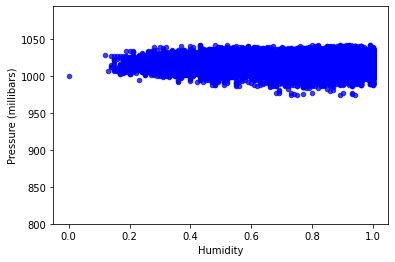

In [ ]:

fig, ax = plt.subplots()
dataset[dataset['Precip Type']== 'rain'].plot.scatter(x='Humidity', y='Pressure (millibars)',c='b',alpha=0.75, ax=ax)
plt.ylim(800)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(96453, 95936)

In [ ]:

x = dataset[['Humidity', 'Pressure (millibars)']]
y = dataset['Precip Type']
y = np.array([ 0 if value == 'snow' else 1 for value in y])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
accuracy_score(y_test,y_pred)

0.8857095463216389

In [ ]:
sum(y == 0)/len(y)

0.11105927239173484

In [ ]:
x_map = np.random.rand(10000, 2)
x_map = x_map*(100,50)+(0,990)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(1000.0, 1042.4997671587257)

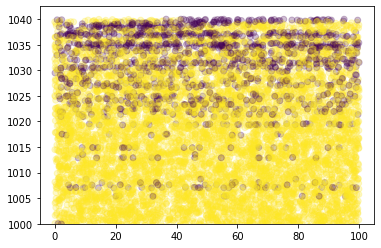

In [ ]:
fig, ax= plt.subplots()

y_map = neigh.predict(x_map)

ax.scatter(x=x_map[:,0], y=x_map[:,1], c=y_map, alpha=.25)
plt.ylim(1000)

In [ ]:
scores = []
for k in  range(1,100):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train,y_train)
  y_pred = neigh.predict(x_test)
  score = accuracy_score(y_test,y_pred)
  scores.append(score)

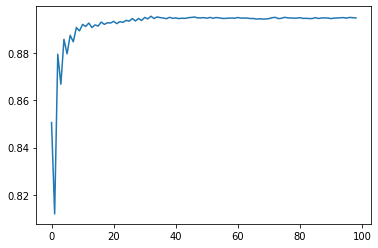

In [ ]:
fig, ax = plt.subplots()
ax.plot(scores)